<span style="color:blue">

# Mini Project # 3
**Due: Oct. 15/2025**

## 1. Loading and Exploring the Data

Get the data file `allFaces.mat` from Canvas (you can read .mat files both in Matlab and Python). Load the file:
```matlab
load allFaces.mat
```

Face pictures of 38 people with several different room lightings are stored in this file. The size of each picture is n=192 by m=168. Each picture is reshaped as a vector of 32256 by 1 and stored as a column in the matrix named `faces`. When you load the file, you get this matrix and also a vector named `nfaces`. The vector `nfaces` is a 1 by 38 row vector. The first element of `nfaces` shows how many pictures of person #0 are stored in the faces matrix. For instance, `nfaces(0)=64`. This means that from column 0 to column 64 we have pictures of person #0 with 64 different room lightings. `nfaces(1) = 64` as well. This means that in the matrix faces from column 65 to 128 we have 64 pictures of person #1, and so on. Not all elements of `nfaces` are equal.



<span style="color:blue">

### A. Reading first pictures of person #1 to person #36:


```matlab
Person = zeros(n,m,36);
figure(1)
for i = 1:36
    Person(:,:,i) = reshape(faces(:,1+sum(nfaces(1:i-1))),n,m);
    subplot(6,6,i)
    imagesc(Person(:,:,i)); colormap gray; axis off;
    pbaspect([0.8802 1 1]);
end
```


faces shape: (32256, 2410)
nfaces shape: (38,)


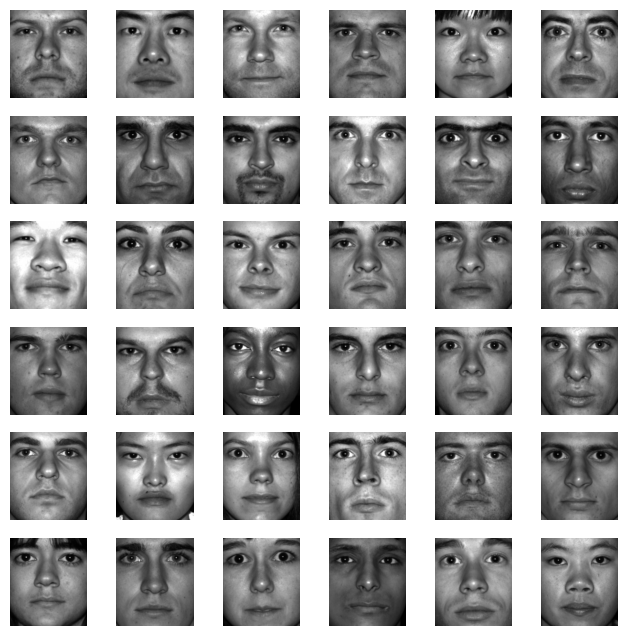

In [35]:
#plotting first pictures of person #0 to person #35
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

data = loadmat("allFaces.mat")
faces = data["faces"]
nfaces = data["nfaces"][0]
n, m = 192, 168

print("faces shape:", faces.shape)
print("nfaces shape:", nfaces.shape)

plt.figure(figsize=(8, 8))
for i in range(36):
    col = int(sum(nfaces[:i]))
    img = faces[:, col].reshape(n, m, order="F")
    plt.subplot(6, 6, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
plt.show()


<span style="color:blue">

### Reading 64 different pictures of Person #1, then Person #2...
```matlab
figure(2)
Snapshot = zeros(n,m,64);
for i = 1:length(nfaces)
    i
    subset = faces(:,1+sum(nfaces(1:i-1)):sum(nfaces(1:i)));
    for j = 1:nfaces(i)
        Snapshot(:,:,j) = reshape(subset(:,j),n,m);
        subplot(6,11,j)
        imagesc(Snapshot(:,:,j)); colormap gray; axis off;
        pbaspect([0.8802 1 1]);
    end
    pause
end
```

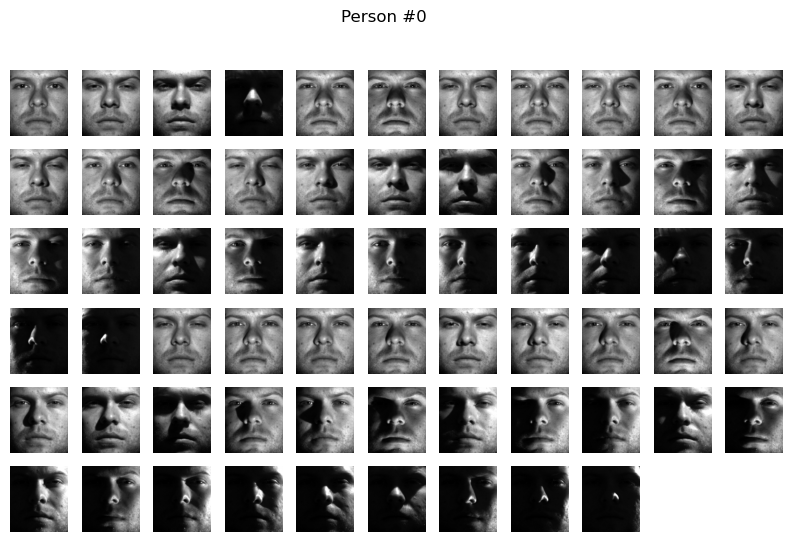

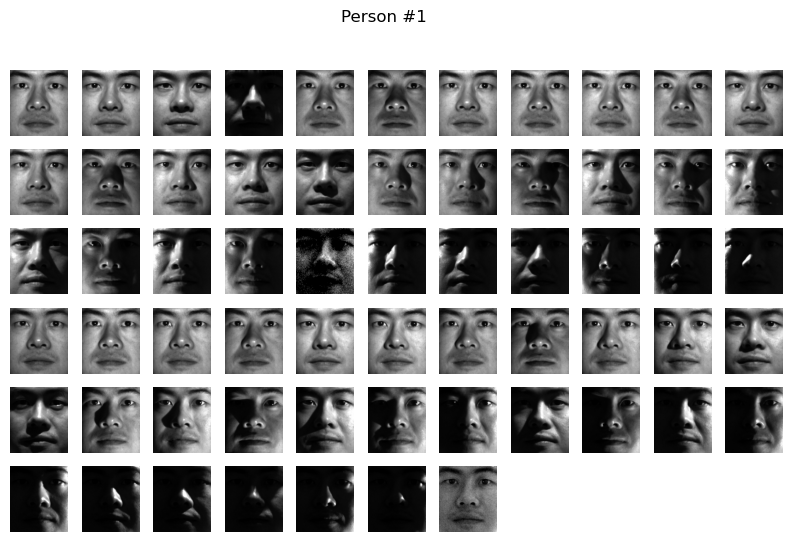

In [36]:
#Reading 64 different pictures of Person #0, then Person #1
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

data = loadmat("allFaces.mat")
faces = data["faces"]
nfaces = data["nfaces"][0]
n, m = 192, 168

for i in range(len(nfaces)-36): #show only the first 2 out of 28 people
    start = int(sum(nfaces[:i]))
    end = int(sum(nfaces[:i + 1]))
    subset = faces[:, start:end]

    plt.figure(figsize=(10, 6))
    for j in range(subset.shape[1]):
        img = subset[:, j].reshape(n, m, order="F")
        plt.subplot(6, 11, j + 1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Person #{i}")
    plt.show()


<span style="color:blue">

## 2.Average Subtracted Faces

Load all faces with all different lightings from person # 0 to person # 35. Calculate the 
average face picture. Subtract that average from all pictures. Store these average 
subtracted faces in matrix X.

In [37]:
def printFace(column):
    plt.imshow(column.reshape(192, 168, order="F"), cmap="gray")
    plt.show()

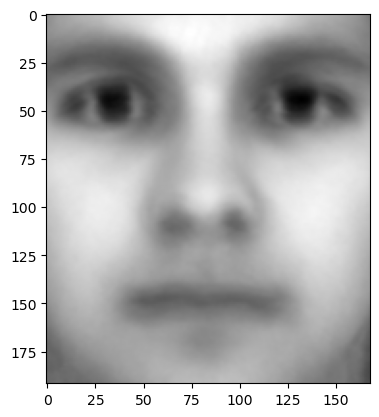

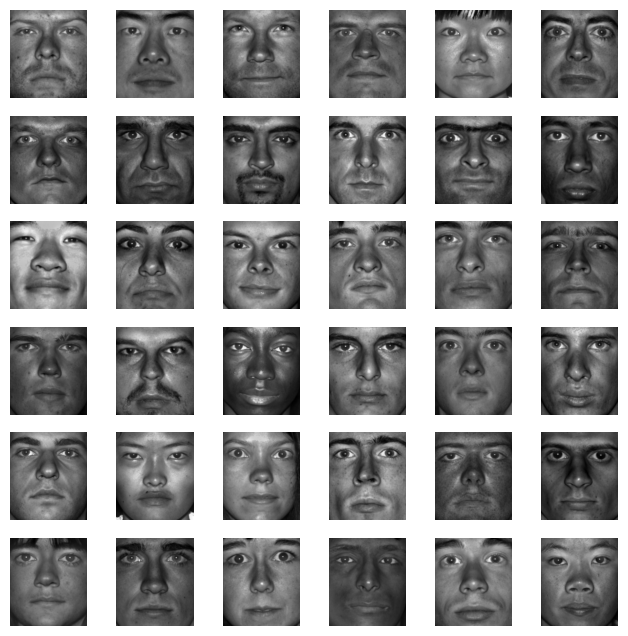

In [38]:
mean_face = faces.mean(axis =1,keepdims= True) #returns a column, its the mean of all rows, where each row is a pixel position
X = faces - mean_face

printFace(mean_face)


plt.figure(figsize=(8, 8))
for i in range(36):
    col = int(sum(nfaces[:i]))
    img = X[:, col].reshape(n, m, order="F")
    plt.subplot(6, 6, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
plt.show()


<span style="color:blue">

## 3. SVD and Eigenfaces

Calculate all singular values and singular vectors of X (in Matlab: `[U,S,V]=svd(X,'econ')`). Reshape these U vectors to 2-dimensional pictures of size 192 by 168. These are our eigenfaces. Plot the first 54 eigenfaces.

Carefully investigate these eigenfaces. Do you think each eigenface is trying to detect certain features?




* **U:** matrix *(pixels × r)* — each column is an eigenface.
* **S:** vector *(r,)* — importance of each eigenface.
* **Vᵀ:** matrix *(r × images)* — how much each eigenface appears in each image.
* **r:** number of **eigenfaces (components)** kept; it equals the smaller of *(pixels, images)* and represents how many unique patterns the data contains.
  Together they make ( X = U \times S \times V^T ).


X shape: (32256, 2410)
U shape: (32256, 2410)
S shape: (2410,)
VT shape: (2410, 2410)


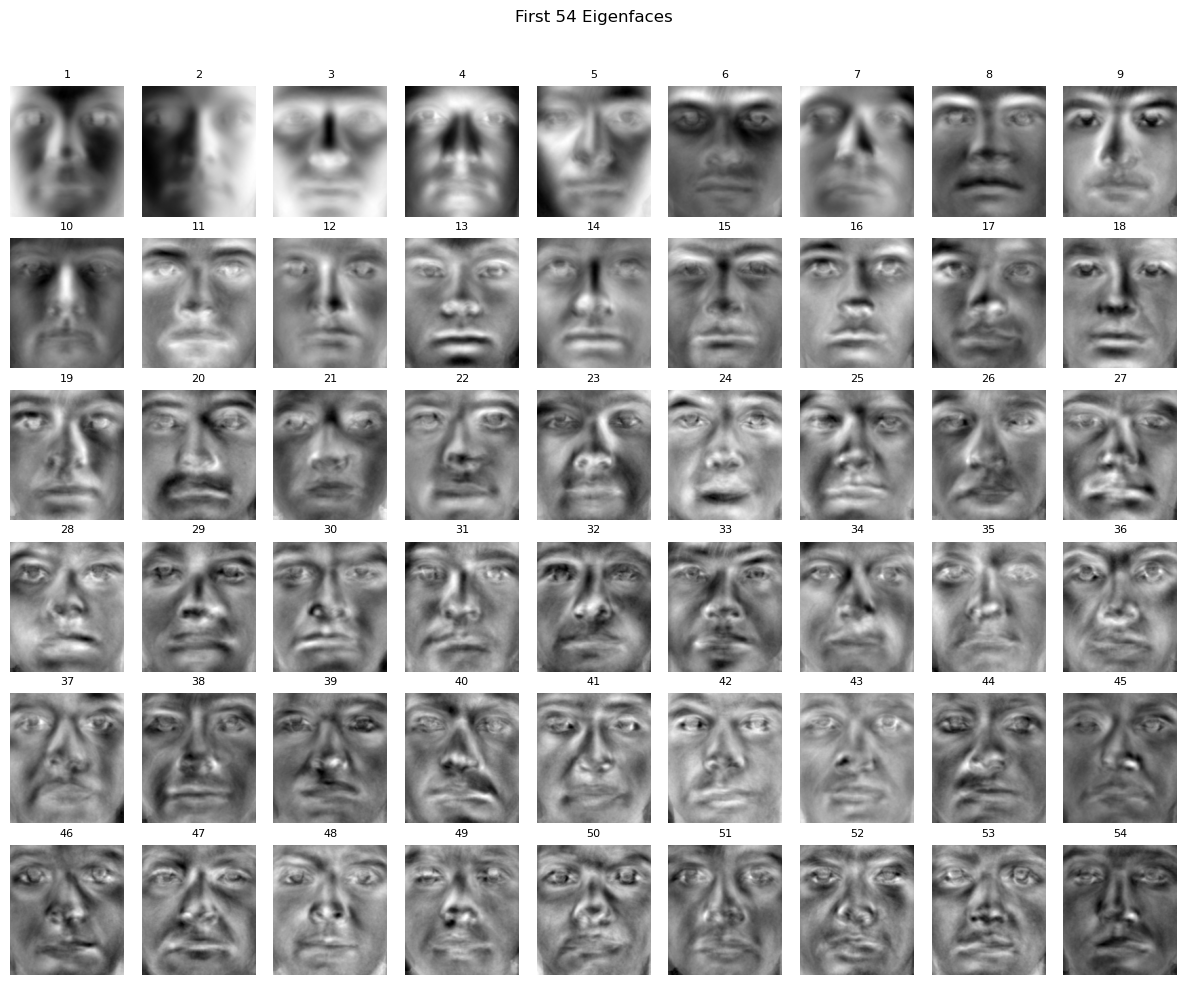

In [39]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

print("X shape:", X.shape)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)

plt.figure(figsize=(12, 10))
for i in range(54):
    plt.subplot(6, 9, i + 1)
    plt.imshow(U[:, i].reshape(n, m, order="F"), cmap="gray")
    plt.axis("off")
    plt.title(f"{i+1}", fontsize=8)
plt.suptitle("First 54 Eigenfaces")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<span style="color:blue">

Compute the inner product of the first and the 5th eigenfaces (do the computations with vectors, before reshaping to 2-dimensional pictures). Are these eigenfaces orthogonal? How about the 10th eigenface and 15th eigenface? Are they all orthogonal?

In [40]:
inner_product_1_5= (U[:,0]).T @ U[:,4]
print(inner_product_1_5)


inner_product_10_15= (U[:,9]).T @ U[:,14]
print(inner_product_10_15)

-1.8041124150158794e-16
6.938893903907228e-17


Yes, these vectors are orthogonal to eachother. As we see, their values are in the magnitude of power of -16 and -17, thus, it is essentially zero. As we know, the inner product will be zero when two values are orthogonal (90º angle between them, cosine=0)

<span style="color:blue">

## 4. Face Reconstruction Using Eigenfaces

Now let's decompose the first picture of person #36 to these eigenfaces.

<span style="color:blue">
If we assume that vector V is the first picture of person #36, then:

$$V \approx \sum_{i=1}^{r} \alpha_i U_i \text{ where } \alpha_i = (U_i)^T V$$

We are truncating at some r. What is the maximum value of r?

Plot the approximation of vector V as a 2-dimensional picture for r=5,10,200,800,100.

The maximumm value of r is the amount of eigen faces, which was found to be 2410. So, since we will be approximating a face as a linear combination of the eigenfaces, we must determine how many eigenfaces to use to be satisfactory.

In [41]:
def reconstruct(U, centered_face, mean_face, r):
    U_sub = U[:, :r]                     # (32256, r)
    alpha = U_sub.T @ centered_face      # (r, 1)
    recon = U_sub @ alpha + mean_face    # (32256, 1)

    print(f"Reconstructed picture with r = {r}\n")
    printFace(recon)

Reconstructed picture with r = 5



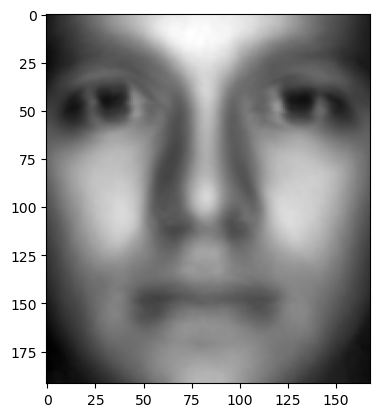

Reconstructed picture with r = 10



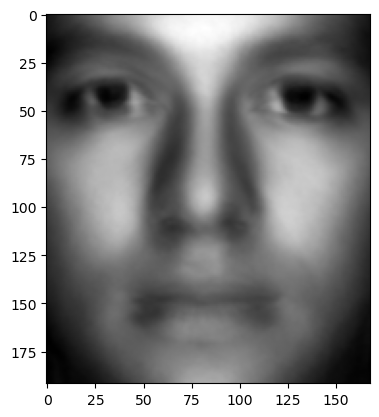

Reconstructed picture with r = 200



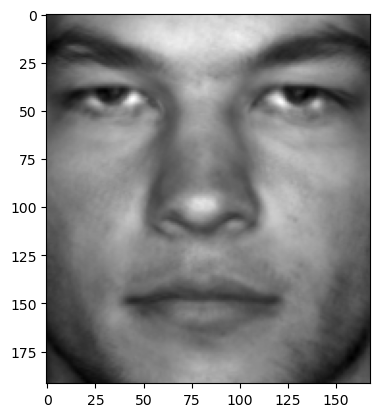

Reconstructed picture with r = 800



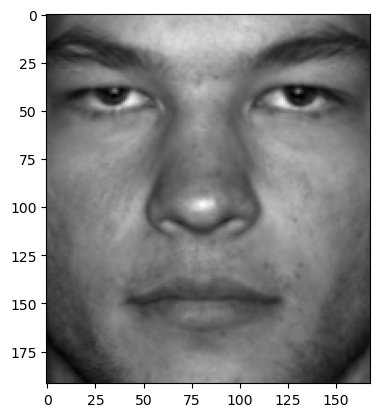

Reconstructed picture with r = 100



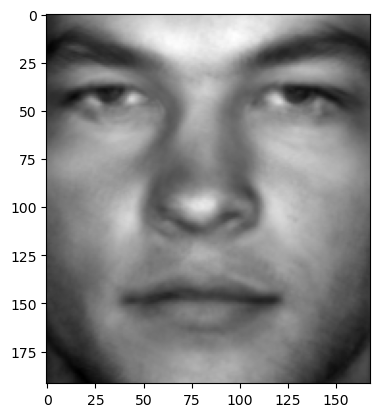

In [42]:
index = sum(nfaces[:36])                    # start col for person 36 (0-based)
face_36 = faces[:, index:index+1]           # (32256, 1)
centered_face_36 = face_36 - mean_face      # (32256, 1)

r_values = [5, 10, 200, 800, 100]
for r in r_values:
    reconstruct(U, centered_face_36, mean_face, r)

here is the original image of the face


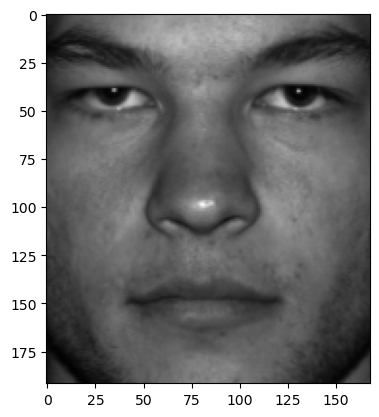

In [43]:
print("here is the original image of the face")
printFace(face_36)

<span style="color:blue">

Do you think you can find a good approximation of the picture with r=100?


When comparing the original image with the approximations with r= 5, 10, 200, 800, we see that there is an obvious increase in the quality of the image. At r=100, I beleive that the appriximation is adequate, however, it is blurry, and eyes from other eigenfaces are somewhat present below the individual's eyes. Depending on the purpose of the image, it may be considered a good approzimation.

<span style="color:blue">

## 5. Singular Value Analysis

Plot singular values (in a semi-logarithmic scale, horizontal axis representing the index, vertical axis representing the value of the singular value, vertical axis is scaled logarithmically). Do you see a good point for truncation?

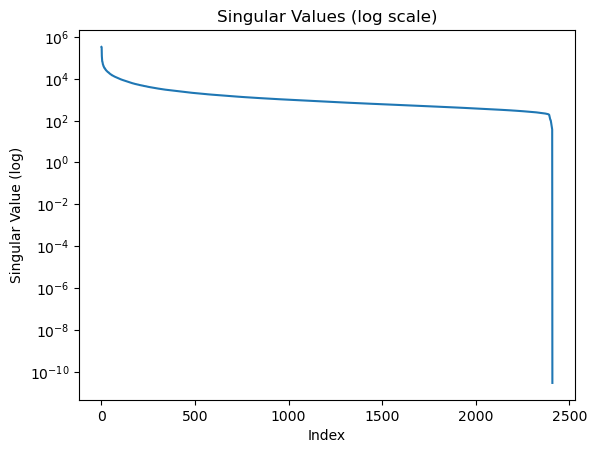

In [44]:
plt.semilogy(S)
plt.title("Singular Values (log scale)")
plt.xlabel("Index")
plt.ylabel("Singular Value (log)")
plt.show()


As we can see, truncation is very important, as the singular value has an exponential dropoff. At first, adding more singular values to the appriximation does a significant improvement, but after index 2300, there is no apparent benefit as the singular value is essentially zero. Truncation is very important as it allows us to be efficient by using the significant singular values, while not having to overwork to use the samller ones. 

<span style="color:blue">

## 6. Eigenface Classification

Get all 64 different pictures of Person #1. How much of eigenface number 5 do you have in each picture of person #1? (For instance, if V₁ is the vector that represents the first picture of person #1, and U⁽⁵⁾ is the 5th eigenface, α = (V₁)ᵀU⁽⁵⁾, we have α amount of 5th eigenface in the first picture of person 1).



In [45]:
def get_alphas(pid, faces, nfaces, mean_face, U):
    start = int(sum(nfaces[:pid]))
    end = start + int(nfaces[pid])
    mf = mean_face if mean_face.ndim == 2 else mean_face[:, None]
    X_p = faces[:, start:end] - mf
    alphas = U.T @ X_p          # each row = eigenface, each column = image
    return alphas               # shape: (num_eigenfaces, num_images_for_person)


In [46]:
alpha_person2 = get_alphas(1, faces, nfaces, mean_face, U)
print(alpha_person2.shape)  # (r, number_of_images_for_person2)


(2410, 62)


<span style="color:blue">
How much of each eigenface 5 do we have in every picture of person #1? <BR>
How much of each eigenface 6 do we have in every picture of person #1?




In [47]:
alpha5 = alpha_person2[4, :]
alpha6 = alpha_person2[5, :]

print("Alpha 5 (amount of 5th eigenface in each picture of person #1):")
print(alpha5)

print("\nAlpha 6 (amount of 6th eigenface in each picture of person #1):")
print(alpha6)

Alpha 5 (amount of 5th eigenface in each picture of person #1):
[ 1039.02605462  1222.06478502  1402.29294636  1150.477267
  1022.01941017   851.58889802  1350.84968251  1083.26219911
  1203.10683805   727.65278532  1202.15677067  1033.04384756
   377.08399438  1186.96514222  1604.75446877  1469.89250084
   363.00080872   518.74060635  -520.80391287  1280.3517136
  -565.07868746  -445.49351236  1902.68177421 -1636.94438477
   510.8893324  -1711.47018452   429.06634126  -822.73139164
   971.32998334  1761.72577579 -1971.01431648 -1201.36294407
    54.27995235  1227.13207946  1320.69481327  1340.86579778
  1176.40268309  1280.8866491   1334.59626105  1244.11965698
   975.91581135  1343.16612903  1350.93437672  1009.18491084
   431.64986972  1241.57339995  1149.63248022  1598.90201842
   584.11530785  1625.98966007  1117.94734014  -483.23202634
  2218.02329914   213.45541549  2164.4802894   1693.35784717
   595.20804228   -33.26582585   207.12663009  1996.08608484
   891.65516863   461.83

<span style="color:blue">

Plot a 2-dimensional graph in which the horizontal axis is the 5th eigenface and vertical axis is the 6th eigenface. In this plane mark how much of each eigenfaces 5th and 6th exists in all pictures of person 1 (black color) and also person 6 (red color). Can you use this graph to implement a good classification algorithm for face recognition? Can you do this with SVM?


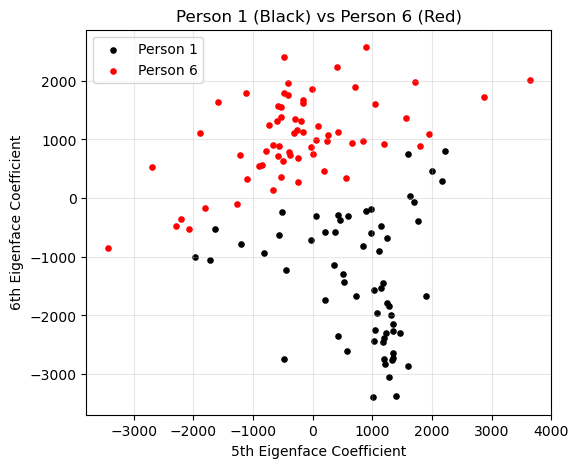

In [48]:
# person 7 (0-based index = 6)
alpha_person7 = get_alphas(6, faces, nfaces, mean_face, U)
alpha5_p7 = alpha_person7[4, :]
alpha6_p7 = alpha_person7[5, :]

# Plot EF5 vs EF6 for both persons
plt.figure(figsize=(6,5))
plt.scatter(alpha5, alpha6, c='k', s=14, label='Person 1')
plt.scatter(alpha5_p7, alpha6_p7, c='r', s=14, label='Person 6')
plt.xlabel("5th Eigenface Coefficient")
plt.ylabel("6th Eigenface Coefficient")
plt.title("Person 1 (Black) vs Person 6 (Red)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Yes, this graph can be used to implement a good classification algorithm for face recognition. As we can see, it clearly separates, for each person, which individual has more of a resemblance to the 5th eigenface or the 6th eigenface. An eigenface can be considered synonymous with an arbitrary facial feature. We see how the different eigenfaces show that different people have stronger resemblances to different features, just as we see with person 2 and person 7. A support vector machine can generate a hyperplane with margin that can separate this 2D space.